In [19]:
from sklearn import metrics, model_selection
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
import matplotlib.pylab as plt
import numpy as np
from sklearn import metrics
import pandas as pd

In [21]:
train = pd.read_csv('../data/X_train.csv')
valid = pd.read_csv('../data/X_val.csv')
test = pd.read_csv('../data/X_test.csv')

/var/folders/3n/bnxfvqwj6f31qqcdrm4gdgvw0000gn/T/ipykernel_28002/3715692351.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv('../data/X_train.csv')


In [23]:

#keep only rating features
rating_features = [x for x in  train if 'rating' in x]

X_train = train[rating_features]
Y_train = train['target_int']
X_val = valid[rating_features]
Y_val = valid['target_int']
X_test = test[rating_features]


In [24]:
#build a simple pipeline that fill nans values with the mean and fit a logistic regression classifier without regulariation.
pipeline = Pipeline(steps=[
    ('inputer', SimpleImputer(strategy='mean')), 
    ("classifier", LogisticRegression(solver='sag',C=1e5))
])

In [25]:
pipeline.fit(X_train,Y_train)

Pipeline(steps=[('inputer', SimpleImputer()),
                ('classifier', LogisticRegression(C=100000.0, solver='sag'))])

              precision    recall  f1-score   support

           0       0.49      0.44      0.46      7139
           1       0.33      0.00      0.01      5911
           2       0.49      0.83      0.62      9745

    accuracy                           0.49     22795
   macro avg       0.44      0.42      0.36     22795
weighted avg       0.45      0.49      0.41     22795

Log loss: 1.0178281646563843


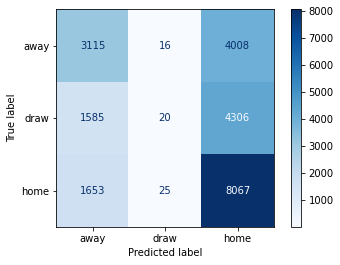

In [30]:
target2int = {'away': 0, 'draw': 1, 'home': 2}

predictions_val = pipeline.predict_proba(X_val)
preds = np.argmax(predictions_val, axis=1)
report = metrics.classification_report(Y_val, preds)
print(report)
logloss = metrics.log_loss(Y_val, predictions_val)
print('Log loss:', logloss)
cm = metrics.confusion_matrix(Y_val, preds)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(target2int.keys()))
disp.plot(cmap=plt.cm.Blues)
plt.show()

<AxesSubplot:ylabel='Frequency'>

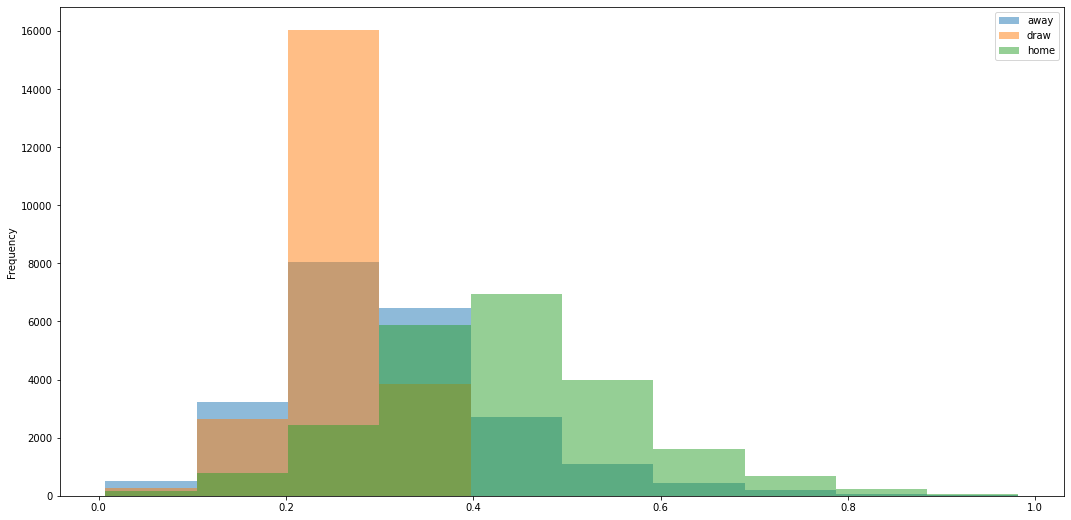

In [32]:
results_val = pd.DataFrame({
    'away': predictions_val[:, 0],
    'draw': predictions_val[:, 1],
    'home': predictions_val[:, 2]
})
results_val.plot.hist(alpha=0.5,figsize=(18,9))

<AxesSubplot:ylabel='Frequency'>

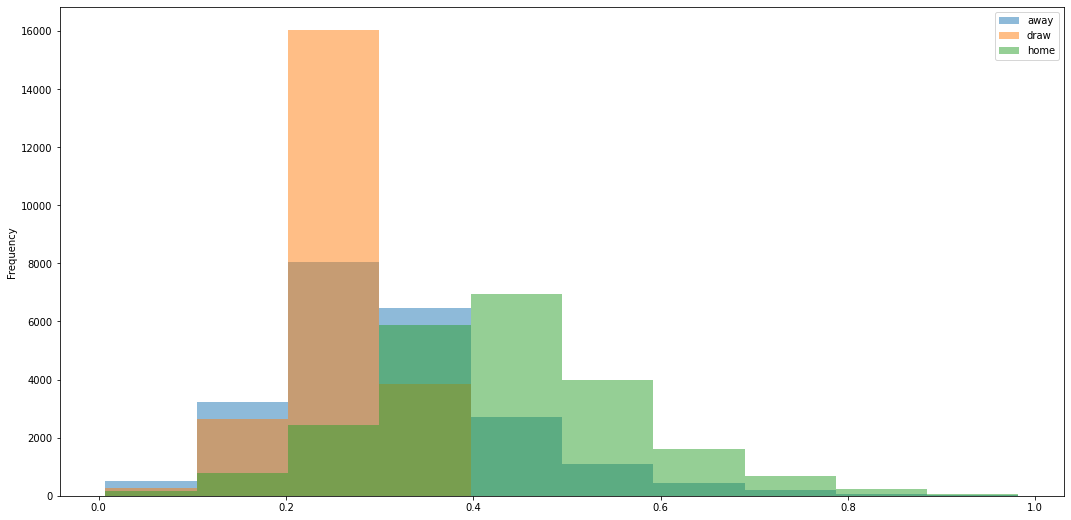

In [33]:
predictions_test = pipeline.predict_proba(X_test)
results_test = pd.DataFrame({
    'away': predictions_test[:, 0],
    'draw': predictions_test[:, 1],
    'home': predictions_test[:, 2]
})
results_test.plot.hist(alpha=0.5,figsize=(18,9))